<a href="https://colab.research.google.com/github/aishwarya8ts/deepface-photo-finder/blob/main/image_sorter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.12.0
!pip install deepface==0.0.79


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 69.7 MB/s eta 0:00:00
 

In [1]:
from deepface import DeepFace
print("✅ DeepFace is ready!")


Directory  /root /.deepface created
Directory  /root /.deepface/weights created
✅ DeepFace is ready!


In [2]:
from deepface import DeepFace

# Define paths (replace with your real file names)
face_image_path = "/content/drive/MyDrive/aishu_images/AISHU.jpg"
group_images_path = "/content/drive/MyDrive/aishu_images"

# Run face matching
matched_faces = DeepFace.find(
    img_path=face_image_path,
    db_path=group_images_path,
    detector_backend='opencv',
    enforce_detection=False
)


Finding representations:   0%|          | 0/12 [00:00<?, ?it/s]

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  0%|          | 2.62M/580M [00:00<00:22, 25.9MB/s]
  5%|▍         | 26.7M/580M [00:00<00:04, 119MB/s] 
  9%|▊         | 50.3M/580M [00:00<00:03, 161MB/s]
 13%|█▎        | 77.1M/580M [00:00<00:02, 198MB/s]
 18%|█▊        | 103M/580M [00:00<00:02, 218MB/s] 
 22%|██▏       | 126M/580M [00:00<00:02, 221MB/s]
 26%|██▌       | 149M/580M [00:00<00:02, 204MB/s]
 29%|██▉       | 170M/580M [00:00<00:02, 204MB/s]
 33%|███▎      | 192M/580M [00:00<00:01, 210MB/s]
 37%|███▋      | 217M/580M [00:01<00:01, 218MB/s]
 41%|████      | 239M/580M [00:01<00:01, 219MB/s]
 45%|████▌     | 264M/580M [00:01<00:01, 224MB/s]
 49%|████▉     | 286M/580M [00:01<00:01, 215MB/s]
 53%|█████▎    | 308M/580M [00:01<00:01, 213MB/s]
 57%|█████▋    | 333M/580M [00:01<00:01, 223MB/s]
 61%|██████▏   | 356M/580M [00:01<00:01, 21

Representations stored in /content/drive/MyDrive/aishu_images/representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  66.35460305213928  seconds


/content/drive/MyDrive/aishu_images/AISHU.jpg


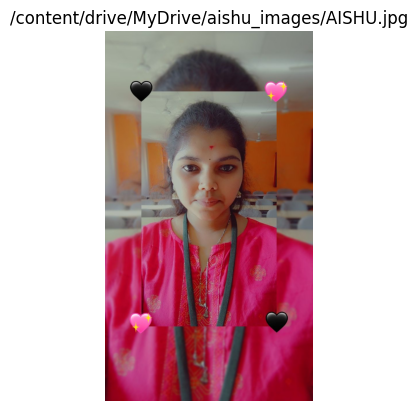

/content/drive/MyDrive/aishu_images/IMG-20250620-WA0028.jpg


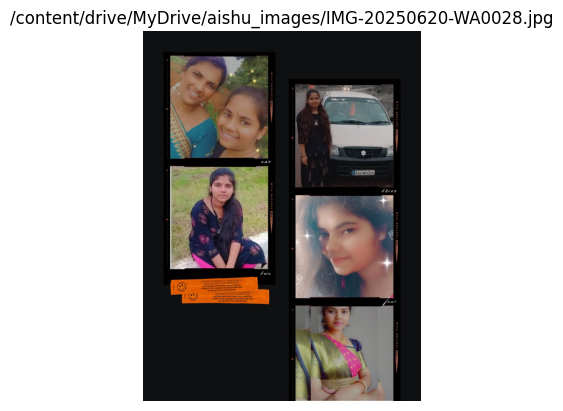

/content/drive/MyDrive/aishu_images/IMG-20250620-WA0026.jpg


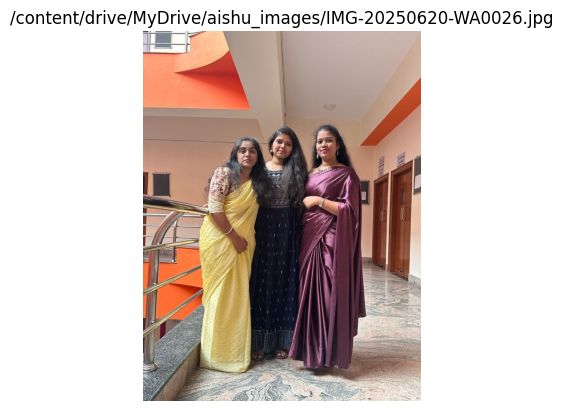

/content/drive/MyDrive/aishu_images/IMG-20250620-WA0030.jpg


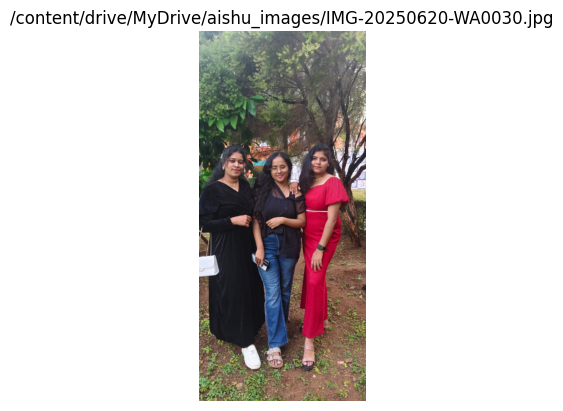

/content/drive/MyDrive/aishu_images/IMG-20250620-WA0028.jpg


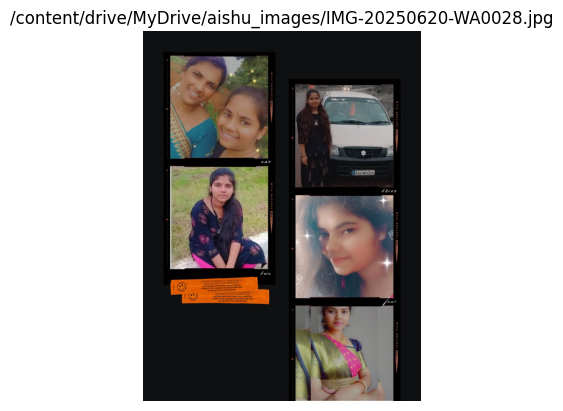

/content/drive/MyDrive/aishu_images/IMG-20250620-WA0022.jpg


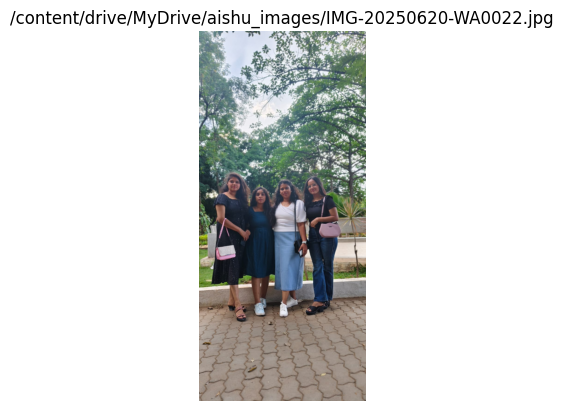

/content/drive/MyDrive/aishu_images/IMG-20250620-WA0027.jpg


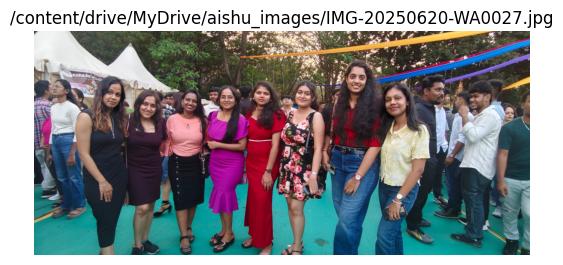

/content/drive/MyDrive/aishu_images/IMG-20250620-WA0020.jpg


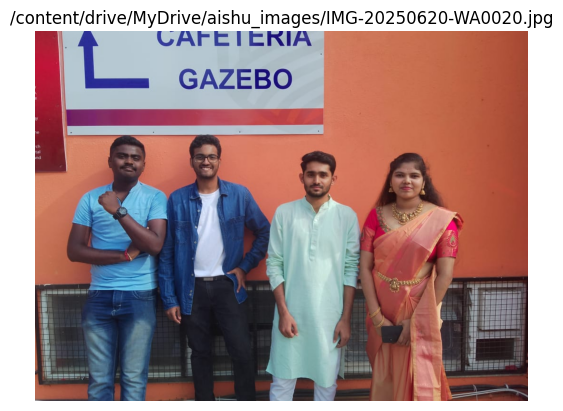

/content/drive/MyDrive/aishu_images/IMG-20250620-WA0022.jpg


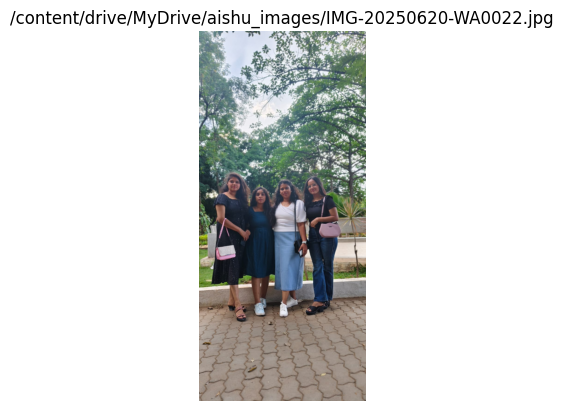

/content/drive/MyDrive/aishu_images/IMG-20250620-WA0028.jpg


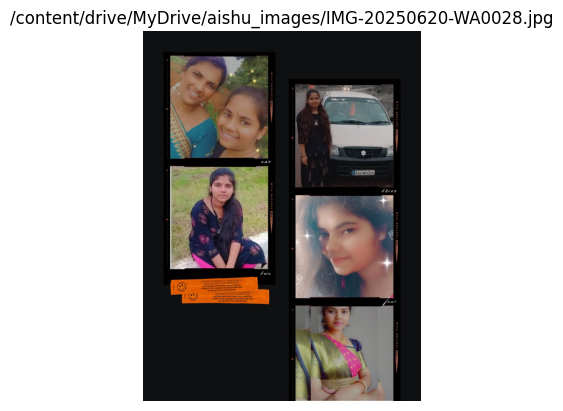

In [3]:
import matplotlib.pyplot as plt
import cv2

if len(matched_faces) > 0 and not matched_faces[0].empty:
    for path in matched_faces[0]['identity']:
        print(path)
        img = cv2.imread(path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(path)
        plt.show()
else:
    print("No matches found.")


In [6]:
import shutil
import os
# Create a folder to store matched images
os.makedirs("matched_results", exist_ok=True)

# Copy matched images
for idx, row in matched_faces[0].iterrows():
    source = row["identity"]
    filename = os.path.basename(source)
    shutil.copy(source, f"matched_results/{filename}")

# Zip the folder
shutil.make_archive("matched_faces", 'zip', "matched_results")

# Let user download the zip
from google.colab import files
files.download("matched_faces.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import shutil
shutil.make_archive("face_finder_app", 'zip', "/content/drive/MyDrive/aishu_images/aishu_images")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/aishu_images/aishu_images'